In [9]:
import pandas as pd
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt 

In [10]:
REGION_LIST = ['Far_West','Great_Lakes', 'Mideast', 'New_England', 'Plains', 'Rocky_Mountain', 'Southeast', 'Southwest','all']
VALUES_LIST = ['Pop', 'GDP', 'PI', 'Sub', 'CE', 'TPI', 'GDPp', 'PIp']

#Create dictionaries for user input
thisdic = {"far_west":"Far_West","great_lakes":"Great_Lakes", "mideast":"Mideast","new_england":"New_England", "plains":"Plains", "rocky_mountain":"Rocky_Mountain", "southeast":"Southeast", "southwest":"Southwest","all":"all"}
thisdic1 = {"Pop":"Population (millions)", "GDP":"GDP (billions)", "PI":"Personal Income (billions)","Sub":"Subsidies (millions)","CE":"Comp of Emp (billions)","TPI":"Tax on Prod/Imp (billions)", "GDPp":"GDP per Capita","PIp":"Per capita personal income"}
thisdic2 = {"Pop":"Population(m)","GDP": "GDP(b)","PI":"Income(b)","Sub":"Subsidies(m)","CE":"Compensation(b)","TPI":"Taxes(b)","GDPp":"GDP per Capita","PIp":"Per capita personal income"}

In [11]:
#Create function to read file with given filename
def read_file():
    try:
        file_name = input("What is the filename? ")
        df = pd.read_csv(file_name)  #read the csv file into dataframe
        return df                    #return dataframe
    except FileNotFoundError:
        print("File not found")      #if filename cannot be found, ask to enter again
        df = read_file()
        return df

In [12]:
#Create function to calculate GDP per Capita and Per capita personla income
def add_GDPp_PIp(df):
    df['GDP per Capita'] = round(df['GDP (billions)'] / df['Population (millions)']*1000, 2)            #append GDP per Capita to df
    df['Per capita personal income'] = round(df['Personal Income (billions)'] / df['Population (millions)']*1000, 2)   #append Per capita personal income to df
    return df

In [13]:
def get_region_data(df):
    while True: 
        data = input("Specify a region from this list -- far_west,great_lakes,mideast,new_england,plains,rocky_mountain,southeast,southwest,all: ").lower() #change input into lowercase
        if data == "all":                              #If data == "all", return full df and data
            return df, data
        elif data in (x.lower() for x in REGION_LIST): #If data is in region list, return df of selected region and data
            df = df.loc[df["Region"]==thisdic[data]]
            return df, data
        else:                                          #If data is not all or in region list, keep prompting
            print("Sorry, your response is invalid.") 

In [14]:
#Create function to find out the states with highest and lowest GDP per capita and Per capita personal income
def get_max_min(df,data):
    state_max1 = df['State'][df['GDP per Capita'] == df['GDP per Capita'].max()].to_string(index=False).replace(" ", "")
    GDP_max = df['GDP per Capita'][df['GDP per Capita'] == df['GDP per Capita'].max()].apply(lambda x : "${:,.2f}".format(x)).to_string(index=False)

    state_min1 = df['State'][df['GDP per Capita'] == df['GDP per Capita'].min()].to_string(index=False).replace(" ", "")
    GDP_min = df['GDP per Capita'][df['GDP per Capita'] == df['GDP per Capita'].min()].apply(lambda x : "${:,.2f}".format(x)).to_string(index=False)

    state_max2 = df['State'][df['Per capita personal income'] == df['Per capita personal income'].max()].to_string(index=False).replace(" ", "")
    Income_max = df['Per capita personal income'][df['Per capita personal income'] == df['Per capita personal income'].max()].apply(lambda x : "${:,.2f}".format(x)).to_string(index=False)

    state_min2 = df['State'][df['Per capita personal income'] == df['Per capita personal income'].min()].to_string(index=False).replace(" ", "")
    Income_min = df['Per capita personal income'][df['Per capita personal income'] == df['Per capita personal income'].min()].apply(lambda x : "${:,.2f}".format(x)).to_string(index=False)
  
    pd.options.display.float_format = '{:,.2f}'.format      #add format(commas every thousands and round to 2 decimal places) to floats in df
    print("This is the data for the", thisdic[data],"region: ")
    print('')
    print(state_max1, "has the highest GDP per Capita of the region at: ", GDP_max)
    print(state_min1, "has the lowest GDP per Capita of the region at: " , GDP_min)
    print('')
    print(state_max2, "has the highest per capita personal income of the region at: ", Income_max)
    print(state_min2, "has the highest per capita personal income of the region at: ", Income_min)
    print('')
    print("Data for all states in the", thisdic[data],"region: ")
    print('')
    print(df)

In [15]:
#Create function to get plot inputs
def get_plot_input():
    while True:
        PROMPT2 = input("Specify x and y values, space separated from Pop, GDP, PI, Sub, CE, TPI, GDPp, PIp: ").split(" ") #split the input
        x = PROMPT2[0] #First input
        y = PROMPT2[1] #Second input

        if x and y in VALUES_LIST:  #If both inputs are in Values_List, output x and y
            return x, y
        else:                       #If not, keep promting
            print("Please enter values exactly as suggested")
    

#Create function for annotations
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']), size = 10)

#Create function for plotting scatter plot and regressino line
def plot_sct_reg(x,y,df):
    #scatter plot
    plt.scatter(df[thisdic1[x]], df[thisdic1[y]],c="darkblue",s=10)
    pylab.xlabel(thisdic2[x])   #label x axis
    pylab.ylabel(thisdic2[y])   #label y axis
    plt.title(thisdic2[x] + " vs. " + thisdic2[y])  #add title to plot
    label_point(df[thisdic1[x]], df[thisdic1[y]], df["State"], plt) #add annotations to each point

    #regression
    xarr = pylab.array(df[thisdic1[x]]) #numpy array
    yarr = pylab.array(df[thisdic1[y]]) #numpy arry
    m,b = pylab.polyfit(xarr,yarr, deg = 1) #creates line, only takes numpy arrays
    #as parameters
    pylab.plot(xarr,m*xarr + b, '-',c="blue") #plotting the regression line
    plt.show()

What is the filename?  State_Data.csv
Specify a region from this list -- far_west,great_lakes,mideast,new_england,plains,rocky_mountain,southeast,southwest,all:  rocky_Mountain


This is the data for the Rocky_Mountain region: 

Wyoming has the highest GDP per Capita of the region at:   $56,697.38
Montana has the lowest GDP per Capita of the region at:   $32,219.64

Wyoming has the highest per capita personal income of the region at:   $45,063.08
Idaho has the highest per capita personal income of the region at:   $32,076.14

Data for all states in the Rocky_Mountain region: 

       State          Region  Population (millions)  GDP (billions)  \
5   Colorado  Rocky_Mountain                   5.05          230.98   
12     Idaho  Rocky_Mountain                   1.57           50.73   
26   Montana  Rocky_Mountain                   0.99           31.92   
44      Utah  Rocky_Mountain                   2.78          105.20   
50   Wyoming  Rocky_Mountain                   0.56           32.00   

    Personal Income (billions)  Subsidies (millions)  Comp of Emp (billions)  \
5                       210.61                   868                  141.00   
12      

Do you want to make a plot? yes
Specify x and y values, space separated from Pop, GDP, PI, Sub, CE, TPI, GDPp, PIp:  Sub CE


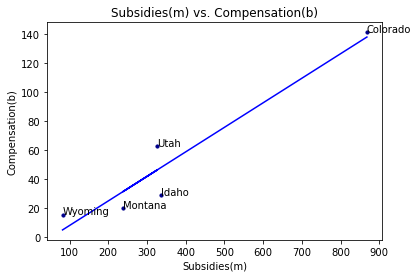

In [18]:
def main():
  #function1:input file name and read file into dataframe
    df = read_file()

  #function2: input region name
    df = add_GDPp_PIp(df)
    df, data = get_region_data(df)
  
 
  #function3:display data with selected region.
    get_max_min(df, data)

  #function4:ask user to choose whether or not to do the plot
    while True:
        option = input("Do you want to make a plot?")

      #If user enter "yes", continue to plot, then break
        if option.lower() == "yes":
            x, y = get_plot_input()
            plot_sct_reg(x,y,df)
            break

      #If user enter "no", break
        if option.lower() == "no":
            break

      #If user enter string outside yes/no, keep prompting
        else:
            print("Please enter either Yes or No.")

main()